# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [4]:
checkpoints = r'D:\anaconda\envs\lab12\checkpoint\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [5]:
train_dir = r'D:\anaconda\envs\lab12\new folder\train'
validation_dir = r'D:\anaconda\envs\lab12\new folder\validation'
test_dir = r'D:\anaconda\envs\lab12\new folder\test'

In [6]:
from keras import models, layers
from keras.optimizers import Adam

# Build the model
model = models.Sequential()

# Block 1
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Block 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Block 3
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # Binary classification

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 128)    512       
 hNormalization)                                                 
                                                        

In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']  # use 'accuracy' instead of 'acc' for clarity
)

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [10]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [11]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5,
                    callbacks=callbacks)

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 6.1528 - accuracy: 0.6950
Epoch 1: val_loss improved from inf to 1.35614, saving model to D:\anaconda\envs\lab12\checkpoint\E1-cp-0001-loss1.36.h5
50/50 [==============================] - 315s 6s/step - loss: 6.1528 - accuracy: 0.6950 - val_loss: 1.3561 - val_accuracy: 0.2659
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 0.5465 - accuracy: 0.7688
Epoch 2: val_loss did not improve from 1.35614
50/50 [==============================] - 311s 6s/step - loss: 0.5465 - accuracy: 0.7688 - val_loss: 1.4326 - val_accuracy: 0.2500
Epoch 3/5
50/50 [==============================] - ETA: 0s - loss: 0.3983 - accuracy: 0.8263
Epoch 3: val_loss did not improve from 1.35614
50/50 [==============================] - 317s 6s/step - loss: 0.3983 - accuracy: 0.8263 - val_loss: 1.7712 - val_accuracy: 0.2500
Epoch 4/5
50/50 [==============================] - ETA: 0s - loss: 0.3469 - accuracy: 0.8562
Epoch 4: val_loss did n

In [23]:
model_history.history

{'loss': [6.152819633483887,
  0.5464562773704529,
  0.39828255772590637,
  0.3469429016113281,
  0.30718913674354553],
 'accuracy': [0.6949999928474426,
  0.768750011920929,
  0.8262500166893005,
  0.856249988079071,
  0.8768749833106995],
 'val_loss': [1.356135368347168,
  1.4326317310333252,
  1.7712019681930542,
  2.519120931625366,
  1.6942615509033203],
 'val_accuracy': [0.2658730149269104, 0.25, 0.25, 0.25, 0.2579365074634552]}

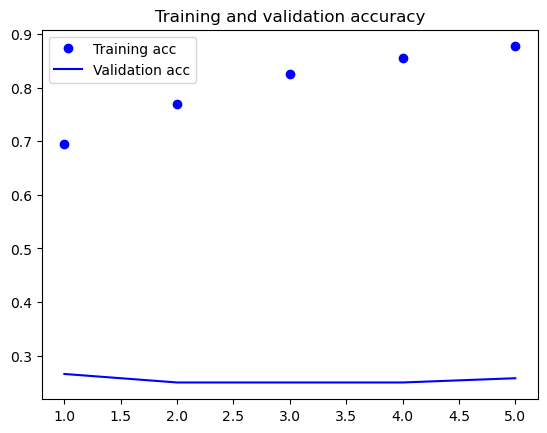

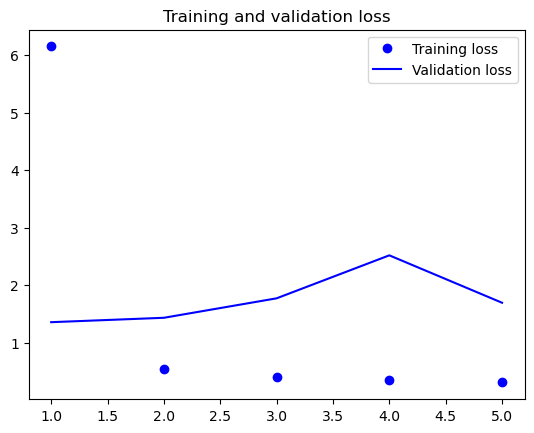

<Figure size 640x480 with 0 Axes>

In [26]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'D:\anaconda\envs\lab12\computer vision\model_Accuracy.png')

In [27]:
model.save(r'D:\anaconda\envs\lab12\computer visionE1-cp-0012-loss0.21.h5')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 7s 953ms/step


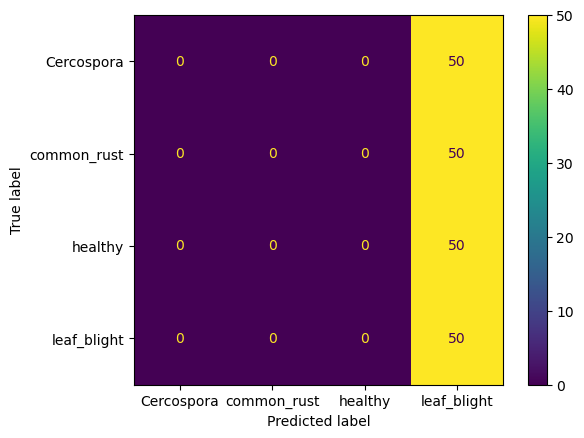

In [28]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [29]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.00      0.00      0.00        50
 common_rust       0.00      0.00      0.00        50
     healthy       0.00      0.00      0.00        50
 leaf_blight       0.25      1.00      0.40        50

    accuracy                           0.25       200
   macro avg       0.06      0.25      0.10       200
weighted avg       0.06      0.25      0.10       200



D:\anaconda\envs\MLLAB\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\MLLAB\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\MLLAB\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
